In [25]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [51]:
with open('../../output/weights/p_date=2022-10-08-18_58_40/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

26001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [52]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [53]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

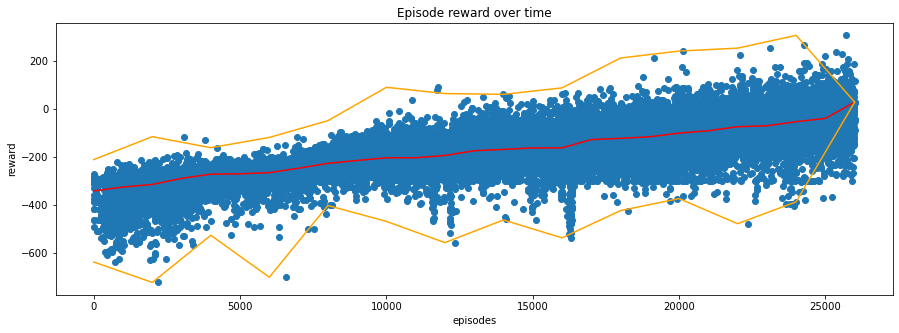

Maximum: 305.29999999999995
Average: -186.85169416560908
Moving Average (simple): {0: -342.5, 1000: -326.5, 2000: -315.6, 3000: -290.4, 4000: -272.8, 5000: -271.4, 6000: -266.6, 7000: -248.1, 8000: -227.6, 9000: -215.9, 10000: -204.6, 11000: -204.4, 12000: -195.1, 13000: -175.2, 14000: -169.7, 15000: -163.5, 16000: -163.4, 17000: -128.8, 18000: -123.6, 19000: -117.0, 20000: -101.9, 21000: -92.0, 22000: -75.2, 23000: -71.3, 24000: -54.2, 25000: -40.7, 26000: 27.4}

Moving Average: []
Minimum: -723.7999999999998


In [54]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

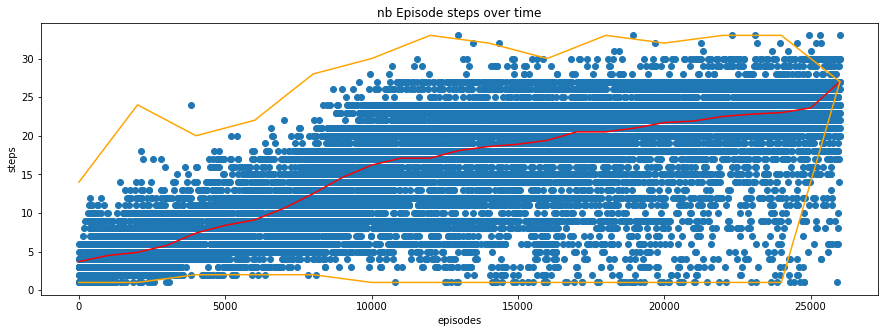

Maximum: 33
Average: 15.548055844005999
Moving Average (simple): {0: 3.7, 1000: 4.5, 2000: 4.9, 3000: 5.8, 4000: 7.4, 5000: 8.4, 6000: 9.1, 7000: 10.6, 8000: 12.5, 9000: 14.6, 10000: 16.2, 11000: 17.1, 12000: 17.1, 13000: 18.1, 14000: 18.6, 15000: 18.9, 16000: 19.4, 17000: 20.5, 18000: 20.5, 19000: 21.0, 20000: 21.7, 21000: 21.9, 22000: 22.5, 23000: 22.8, 24000: 23.0, 25000: 23.6, 26000: 27}

Moving Average: ['+21% (4.5 | 21%)', '+8% (4.9 | 32%)', '+18% (5.8 | 56%)', '+27% (7.4 | 100%)', '+13% (8.4 | 127%)', '+8% (9.1 | 145%)', '+16% (10.6 | 186%)', '+17% (12.5 | 237%)', '+16% (14.6 | 294%)', '+10% (16.2 | 337%)', '+5% (17.1 | 362%)', '0% (17.1 | 362%)', '+5% (18.1 | 389%)', '+2% (18.6 | 402%)', '+1% (18.9 | 410%)', '+2% (19.4 | 424%)', '+5% (20.5 | 454%)', '0% (20.5 | 454%)', '+2% (21.0 | 467%)', '+3% (21.7 | 486%)', '+0% (21.9 | 491%)', '+2% (22.5 | 508%)', '+1% (22.8 | 516%)', '+0% (23.0 | 521%)', '+2% (23.6 | 537%)', '+14% (27.0 | 629%)']
Minimum: 1


In [55]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

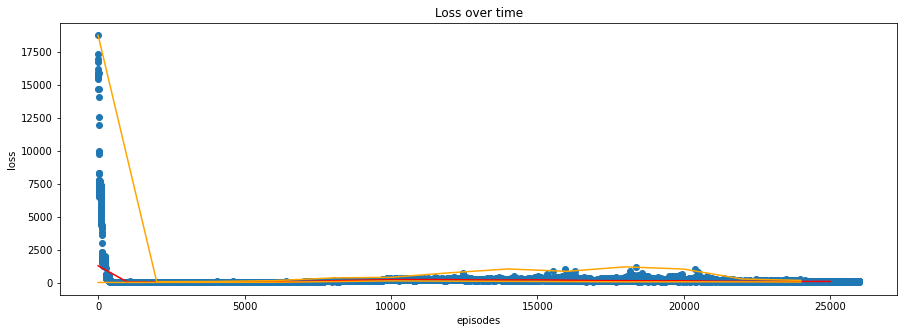

Maximum: 18770.369140625
Average: 192.11659098500854
Moving Average (simple): {0: 1294.3, 1000: 62.7, 2000: 59.7, 3000: 58.8, 4000: 72.0, 5000: 65.2, 6000: 71.4, 7000: 110.5, 8000: 156.8, 9000: 203.0, 10000: 242.1, 11000: 252.0, 12000: 247.3, 13000: 225.0, 14000: 215.3, 15000: 227.7, 16000: 197.7, 17000: 172.6, 18000: 166.3, 19000: 156.7, 20000: 157.6, 21000: 128.2, 22000: 116.6, 23000: 116.4, 24000: 109.2, 25000: 107.4}

Moving Average: ['-95% (62.7 | -95%)', '-4% (59.7 | -95%)', '-1% (58.8 | -95%)', '+22% (72.0 | -94%)', '-9% (65.2 | -94%)', '+9% (71.4 | -94%)', '+54% (110.5 | -91%)', '+41% (156.8 | -87%)', '+29% (203.0 | -84%)', '+19% (242.1 | -81%)', '+4% (252.0 | -80%)', '-1% (247.3 | -80%)', '-9% (225.0 | -82%)', '-4% (215.3 | -83%)', '+5% (227.7 | -82%)', '-13% (197.7 | -84%)', '-12% (172.6 | -86%)', '-3% (166.3 | -87%)', '-5% (156.7 | -87%)', '+0% (157.6 | -87%)', '-18% (128.2 | -90%)', '-9% (116.6 | -90%)', '0% (116.4 | -91%)', '-6% (109.2 | -91%)', '-1% (107.4 | -91%)']
Minim

In [56]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")